# A 1-D Groundwater Finite Difference Example (using matrix methods)
## Lejo Flores

In [2]:
import numpy as np
import matplotlib.pyplot as plt

K = 2.0

xL = 0.0
xR = 100.0
dx = 1

Nx = (xR - xL)/dx + 1

ti = 0.0
tf = 500.0
dt = 0.1

Nt = (tf - ti)/dt + 1

hi = 8.0
hf = 4.0

hL = np.linspace(hi,hi,num=Nt,endpoint=True)
hR = np.linspace(hi,hf,num=Nt,endpoint=True)

x = np.linspace(xL,xR,num=Nx,endpoint=True)

h0 = hi*np.ones(shape=(int(Nx),1))

In [3]:
alpha = K*dt/dx**2
print("alpha = ",alpha)
print("dt = ",dt)
print("dx = ",dx)
if alpha >= 0.5:
    raise Exception("Stability criteria error! Either decrease dt or increase dx!")

alpha =  0.2
dt =  0.1
dx =  1


In [4]:
# Create centered-space finite differencing matrix
diag0 = -2.0*np.ones((int(Nx),1))
diag1 = np.ones((int(Nx-1),1))

Delta2 = np.matrix(np.diagflat(-2.0*np.ones((int(Nx),1)),k=0) + np.diagflat(np.ones((int(Nx-1),1)),k=1) \
    + np.diagflat(np.ones((int(Nx-1),1)),k=-1))

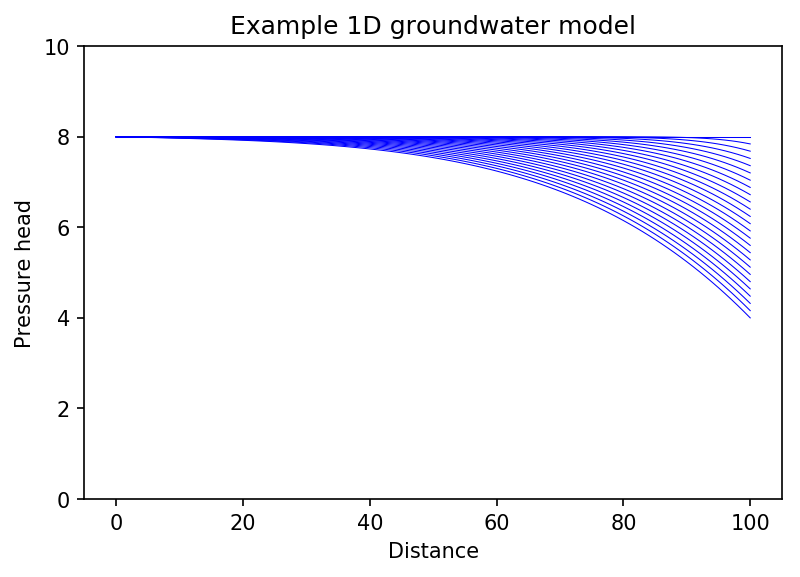

In [5]:
H = np.matrix(np.zeros(shape=(int(Nx),int(Nt))))

plt.figure(figsize=(6,4), dpi=150)
plt.xlabel("Distance")
plt.ylabel("Pressure head")
plt.title("Example 1D groundwater model")
plt.ylim(0.0,hi+2.0)
plt.plot(x,h0,'b',linewidth=0.5)

H[:,0] = np.matrix(h0[:,0]).T

for i in range(1,int(Nt)):
    hinit = H[:,i-1]
        
    hnext = hinit + alpha*Delta2*hinit
    hnext[0] = hL[i]
    hnext[-1] = hR[i]

    H[:,i] = hnext[:,0]
    
    if (i % 200) == 0:
        plt.plot(x,H[:,i],'b',linewidth=0.5)
        
plt.show()

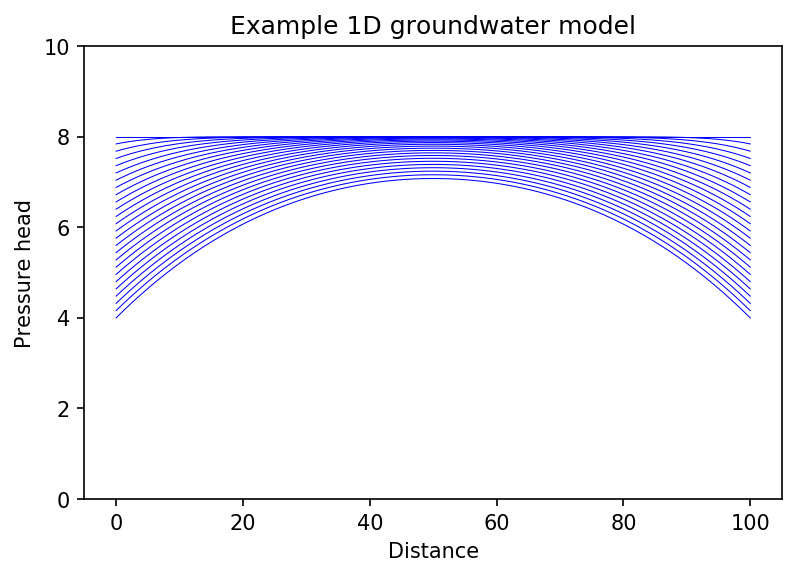

In [6]:
H2 = np.matrix(np.zeros(shape=(int(Nx),int(Nt))))

hL = np.linspace(hi,hf,num=Nt,endpoint=True)
hR = np.linspace(hi,hf,num=Nt,endpoint=True)

plt.figure(figsize=(6,4), dpi=150)
plt.xlabel("Distance")
plt.ylabel("Pressure head")
plt.title("Example 1D groundwater model")
plt.ylim(0.0,hi+2.0)
plt.plot(x,h0,'b',linewidth=0.5)

H2[:,0] = np.matrix(h0[:,0]).T

for i in range(1,int(Nt)):
    hinit = H2[:,i-1]
        
    hnext = hinit + alpha*Delta2*hinit
    hnext[0] = hL[i]
    hnext[-1] = hR[i]

    H2[:,i] = hnext[:,0]
    
    if (i % 200) == 0:
        plt.plot(x,H2[:,i],'b',linewidth=0.5)
        
plt.show()